In [2]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import pickle
from scipy.interpolate import interp1d


In [7]:
nam_f = ["Results/Fid/correl_sep18.pkl","Results/Fid/correl_jun19.pkl",
        "Results/Fid/correl_july3.pkl","Results/Fid/correl_july5.pkl",
        "Results/Fid/correl_july25.pkl"]


# nam_f = ["Results/New/correl_sep18.pkl","Results/New/correl_jun19.pkl",
#         "Results/New/correl_july3.pkl","Results/New/correl_july5.pkl",
#         "Results/New/correl_july25.pkl"]


# "correl_map_HITEMP_HD189_july25.pkl"

Kvec,Vvec = [],[]
corr_fin  = []
sn_fin    = []

for nn in range(len(nam_f)):
    filename = nam_f[nn]
    print("Read data from",filename)
    with open(filename,'rb') as specfile:
        Vsys,Kp,corr,sn_map = pickle.load(specfile)
    corr_fin.append(corr)
    sn_fin.append(sn_map)
    Kvec.append(Kp)
    Vvec.append(Vsys)

Read data from Results/Fid/correl_sep18.pkl
Read data from Results/Fid/correl_jun19.pkl
Read data from Results/Fid/correl_july3.pkl
Read data from Results/Fid/correl_july5.pkl
Read data from Results/Fid/correl_july25.pkl


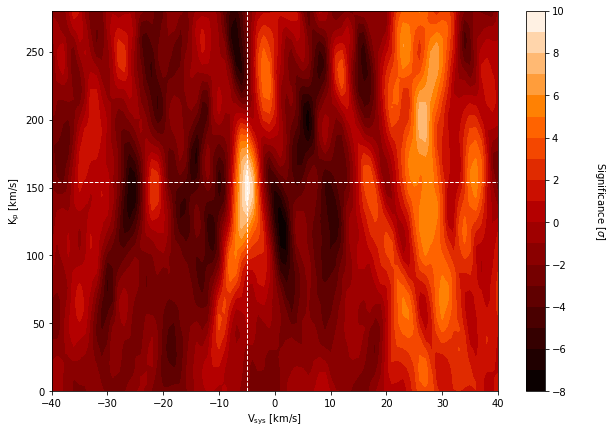

Kp   =  149.9 ( + 14.9 ; - 14.9 ) km/s
Vsys =  -5.0 ( + 0.6 ; - 0.4 ) km/s


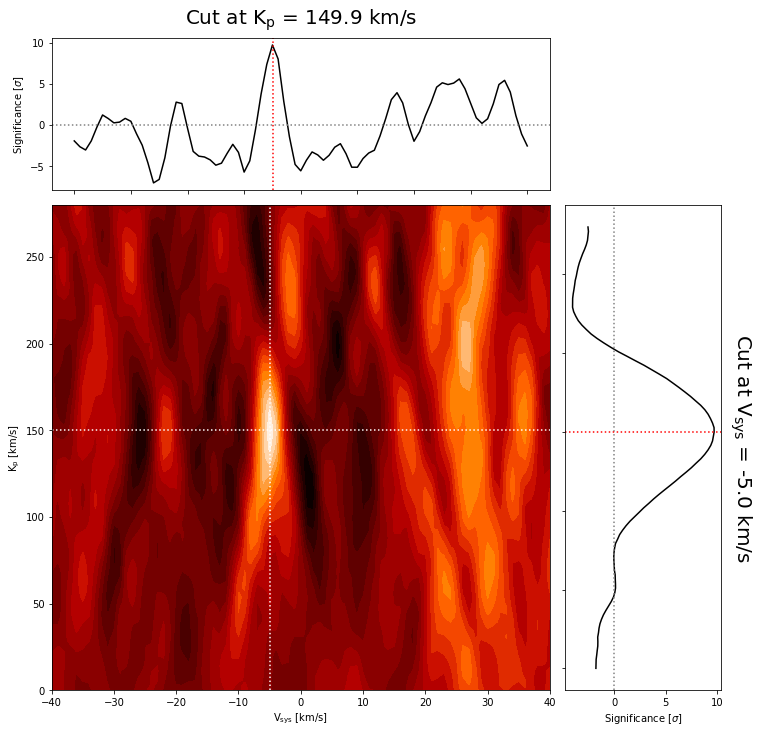

In [8]:
Kp     = np.array(Kvec[0],dtype=float)
Vsys   = np.array(Vvec[0],dtype=float)
SN     = np.sum(sn_fin,axis=0)
levels = 20

K_cut  = 154
V_cut  = -5.0


plt.figure(figsize=(10,7))
plt.contourf(Vsys,Kp,SN,levels=levels,cmap="gist_heat")
plt.ylabel(r"K$_{\rm{p}}$ [km/s]")
plt.xlabel(r"V$_{\rm{sys}}$ [km/s]")
plt.axhline(K_cut,ls="--",lw=1.0,color="w")
plt.axvline(V_cut,ls="--",lw=1.0,color="w")
cb = plt.colorbar()
cb.set_label(r"Significance [$\sigma$]",rotation=270,labelpad=40)
plt.show()







ind_v   = np.argmin(np.abs(Vsys-V_cut))
ind_k   = np.argmin(np.abs(Kp-K_cut))
sn_map  = SN
sn_cutx = sn_map[:,ind_v]
sn_cuty = sn_map[ind_k]

max_det = np.max(SN)
tt      = SN.max() - 1.

f     = interp1d(Kp,sn_cutx)
kpg   = np.linspace(Kp.min(),Kp.max(),1000)
snk   = f(kpg)
snki  = snk[:np.argmax(snk)]
kii   = kpg[:np.argmax(snk)]
snks  = snk[np.argmax(snk):]
kss   = kpg[np.argmax(snk):]
k_inf = kii[np.argmin(np.abs(snki-tt))]
k_sup = kss[np.argmin(np.abs(snks-tt))]
Km    = kpg[np.argmax(snk)]
Ki    = Km-k_inf
Ks    = k_sup-Km


f     = interp1d(Vsys,sn_cuty)
vsg   = np.linspace(Vsys.min(),Vsys.max(),2000)
snv   = f(vsg)
snvi  = snv[:np.argmax(snv)]
vii   = vsg[:np.argmax(snv)]
snvs  = snv[np.argmax(snv):]
vss   = vsg[np.argmax(snv):]
v_inf = vii[np.argmin(np.abs(snvi-tt))]
v_sup = vss[np.argmin(np.abs(snvs-tt))]
Vm    = vsg[np.argmax(snv)]
Vi    = Vm-v_inf
Vs    = v_sup-Vm



K_cut = Km
V_cut = Vm


print("Kp   = ",round(Km,1),"( +",round(Ks,1),"; -",round(Ki,1),") km/s")
print("Vsys = ",round(Vm,1),"( +",round(Vs,1),"; -",round(Vi,1),") km/s")







fig     = plt.figure(figsize=(12,12))
grid    = plt.GridSpec(4, 4, hspace=0.1, wspace=0.1)
main_ax = fig.add_subplot(grid[1:,:3])
y_hist  = fig.add_subplot(grid[1:,-1], yticklabels=[])
x_hist  = fig.add_subplot(grid[:1, :3], xticklabels=[])

# Color map
main_ax.contourf(Vsys,Kp,SN,levels=levels,cmap="gist_heat")
main_ax.axhline(K_cut,ls=":",color="w",lw=1.5)
main_ax.axvline(V_cut,ls=":",color="w",lw=1.5)
main_ax.set_ylabel(r"K$_{\rm{p}}$ [km/s]")
main_ax.set_xlabel(r"V$_{\rm{sys}}$ [km/s]")

# Cut at best Kp
x_hist.plot(Vsys,sn_cuty,"-k")
x_hist.axhline(0.0,ls=":",color="gray")
x_hist.axvline(V_cut,ls=":",color="r")
title_x = r"Cut at K$_{\rm{p}}$ = " + str(round(K_cut,1)) + " km/s"
x_hist.set_xlabel(title_x,rotation=0,labelpad=-190,fontsize=20)
x_hist.set_ylabel(r"Significance [$\sigma$]")

# Cut at best Vsys
y_hist.plot(sn_cutx,Kp,"-k")
y_hist.axvline(0.0,ls=":",color="gray")
y_hist.axhline(K_cut,ls=":",color="r")
title_y = r"Cut at V$_{\rm{sys}}$ = " + str(round(V_cut,1)) + " km/s"
y_hist.set_ylabel(title_y,rotation=270,labelpad=-170,fontsize=20)
y_hist.set_xlabel(r"Significance [$\sigma$]")
plt.show()



In [9]:
max_det





9.71268168284232

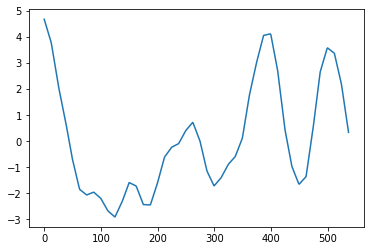

In [41]:
plt.plot(snvs)